# Ecrire un document computationnel autour du SARS-CoV-2 (Covid-19)

## I. Contexte

Le but de cet exercice est d'écrire un document computationnel autour du SARS-CoV-2 (Covid-19). Il faut réaliser une représentaion graphique semblable à celles du [South China Morning Post](https://www.scmp.com/) concernant le nombre total de cas de personne atteintes de la maladie du Covid-19 par pays.
Nous nous concentrons sur les données disponibles à cette [adresse](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv).

Dans notre cas nous regarderons les données des pays suivants : la Belgique (Belgium), la Chine - toutes les provinces sauf Hong-Kong (China), Hong Kong (China, Hong-Kong), la France métropolitaine (France), l’Allemagne (Germany), l’Iran (Iran), l’Italie (Italy), le Japon (Japan), la Corée du Sud (Korea, South), la Hollande sans les colonies (Netherlands), le Portugal (Portugal), l’Espagne (Spain), le Royaume-Unis sans les colonies (United Kingdom), les États-Unis (US).

## II. Exploitation des données

Afin de pouvoir traité ces données en python, il est nécessaire d'importer les bibliothèques python suivantes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Pour ne pas avoir de problème de modification de données entre temps j'enregistre les données localement. Ces données n'évolueront donc pas ce qui évitera des problèmes par la suite. En revanche, la date la plus récentes est le 14/10/2022, date de la sauvegarde local.

In [2]:
# data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_url = "Données Covid 19.csv"

In [3]:
data_raw = pd.read_csv(data_url)

In [4]:
data = data_raw
display(data)

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

Une fois nos données disponibles, je vais chercher les lignes des pays nous intéressant avec la fonction `.loc()` de la bibliothèque Pandas. Une fois ces données localisées, je vais les regrouper sous forme de DataFrame afin de pouvoir les traiter.

In [5]:
Row_Belgium = data.loc[data['Country/Region'] == 'Belgium']
Series_Belgium = pd.Series(data.loc[Row_Belgium.index[0]], name = 'Belgium', dtype = int)

In [6]:
Row_China = data.loc[(data['Country/Region'] == 'China') & (data['Province/State'] != 'Hong Kong')]
Series_China_Total = Row_China.sum()

In [7]:
Row_HongKong = data.loc[data['Province/State'] == 'Hong Kong']
Series_HongKong = pd.Series(data.loc[Row_HongKong.index[0]], name = 'HongKong', dtype = int)

In [8]:
Row_France = data.loc[(data['Province/State'].isna()) & (data['Country/Region'] == 'France')]
Series_France = pd.Series(data.loc[Row_France.index[0]], name = 'France', dtype = int)

In [9]:
Row_Germany = data.loc[data['Country/Region'] == 'Germany']
Series_Germany = pd.Series(data.loc[Row_Germany.index[0]], name = 'Germany', dtype = int)

In [10]:
Row_Iran = data.loc[data['Country/Region'] == 'Iran']
Series_Iran = pd.Series(data.loc[Row_Iran.index[0]], name = 'Iran', dtype = int)

In [11]:
Row_Italy = data.loc[data['Country/Region'] == 'Italy']
Series_Italy = pd.Series(data.loc[Row_Italy.index[0]], name = 'Italy', dtype = int)

In [12]:
Row_Japan = data.loc[data['Country/Region'] == 'Japan']
Series_Japan = pd.Series(data.loc[Row_Japan.index[0]], name = 'Japan', dtype = int)

In [13]:
Row_KoreaSouth = data.loc[data['Country/Region'] == 'Korea, South']
Series_KoreaSouth = pd.Series(data.loc[Row_KoreaSouth.index[0]], name = 'Korea, South', dtype = int)

In [14]:
Row_Netherlands = data.loc[(data['Province/State'].isna()) & (data['Country/Region'] == 'Netherlands')]
Series_Netherlands = pd.Series(data.loc[Row_Netherlands.index[0]], name = 'Netherlands', dtype = int)

In [15]:
Row_Portugal = data.loc[data['Country/Region'] == 'Portugal']
Series_Portugal = pd.Series(data.loc[Row_Portugal.index[0]], name = 'Portugal', dtype = int)

In [16]:
Row_Spain = data.loc[data['Country/Region'] == 'Spain']
Series_Spain = pd.Series(data.loc[Row_Spain.index[0]], name = 'Spain', dtype = int)

In [17]:
Row_UnitedKingdom = data.loc[(data['Province/State'].isna()) & (data['Country/Region'] == 'United Kingdom')]
Series_UnitedKingdom = pd.Series(data.loc[Row_UnitedKingdom.index[0]], name = 'United Kingdom', dtype = int)

In [18]:
Row_US = data.loc[data['Country/Region'] == 'US']
Series_US = pd.Series(data.loc[Row_US.index[0]], name = 'US', dtype = int)

In [19]:
frame = {'Belgium': Series_Belgium, 
         'China': Series_China_Total, 
         'Hong Kong': Series_HongKong, 
         'France': Series_France, 
         'Germany': Series_Germany, 
         'Iran': Series_Iran, 
         'Italy': Series_Italy, 
         'Japan': Series_Japan, 
         'Korea, South': Series_KoreaSouth, 
         'Netherlands': Series_Netherlands, 
         'Portugal': Series_Portugal, 
         'Spain': Series_Spain, 
         'United Kingdom': Series_UnitedKingdom, 
         'US': Series_US}

selected_data_raw = pd.DataFrame(frame)
selected_data = selected_data_raw[4:].reset_index()
selected_data = selected_data.rename(columns={'index': 'Date'})
display(selected_data)

Date  Belgium    China    France   Germany Hong Kong     Iran  \
0     1/22/20        0      548         0         0         0        0   
1     1/23/20        0      641         0         0         2        0   
2     1/24/20        0      918         2         0         2        0   
3     1/25/20        0     1401         3         0         5        0   
4     1/26/20        0     2067         3         0         8        0   
5     1/27/20        0     2869         3         1         8        0   
6     1/28/20        0     5501         4         4         8        0   
7     1/29/20        0     6077         5         4        10        0   
8     1/30/20        0     8131         5         4        10        0   
9     1/31/20        0     9790         5         5        12        0   
10     2/1/20        0    11878         6         8        13        0   
11     2/2/20        0    16615         6        10        15        0   
12     2/3/20        0    19701         6        12        15        0   
13     2/4/20        1    23690         6        12        17        0   
14     2/5/20        1    27419         6        12        21        0   
15     2/6/20        1    30563         6        12        24        0   
16     2/7/20        1    34085         6        13        25        0   
17     2/8/20        1    36788        11        13        26        0   
18     2/9/20        1    39800        11        14        29        0   
19    2/10/20        1    42316        11        14        38        0   
20    2/11/20        1    44337        11        16        49        0   
21    2/12/20        1    44709        11        16        50        0   
22    2/13/20        1    59842        11        16        53        0   
23    2/14/20        1    66302        11        16        56        0   
24    2/15/20        1    68357        12        16        56        0   
25    2/16/20        1    70456        12        16        57        0   
26    2/17/20        1    72374        12        16        60        0   
27    2/18/20        1    74149        12        16        62        0   
28    2/19/20        1    74556        12        16        63        2   
29    2/20/20        1    75009        12        16        68        5   
..        ...      ...      ...       ...       ...       ...      ...   
967   9/15/22  4511590   979044  33856227  32643742   1682896  7541586   
968   9/16/22  4511590   979986  33884825  32680355   1691895  7542230   
969   9/17/22  4511590   980643  33884825  32680356   1700173  7542533   
970   9/18/22  4511590   981796  33884825  32680356   1707495  7542822   
971   9/19/22  4511590   982772  33946300  32740593   1713755  7543548   
972   9/20/22  4517212   983517  33998116  32797308   1719349  7544540   
973   9/21/22  4517212   984255  34036366  32854286   1725036  7545351   
974   9/22/22  4525931   985051  34074830  32905086   1731026  7545855   
975   9/23/22  4525931   985940  34110990  32952050   1736413  7546276   
976   9/24/22  4525931   986771  34110990  32952050   1741603  7546673   
977   9/25/22  4525931   987603  34110990  32952050   1745500  7547089   
978   9/26/22  4533249   988402  34187868  33041332   1749534  7547397   
979   9/27/22  4533249   989220  34261507  33137143   1753201  7547706   
980   9/28/22  4533249   990418  34313401  33216006   1757112  7547968   
981   9/29/22  4544505   991175  34364144  33312373   1761381  7548320   
982   9/30/22  4544505   992038  34412387  33386229   1765404  7548648   
983   10/1/22  4544505   992839  34412387  33386229   1769311  7549186   
984   10/2/22  4544505   993595  34412387  33386229   1772880  7549586   
985   10/3/22  4553333   994450  34505126  33386229   1776409  7550021   
986   10/4/22  4553333   995363  34592885  33519761   1779695  7550401   
987   10/5/22  4553333   996443  34659449  33652255   1783337  7550691   
988   10/6/22  4566207   997782  34724986  33826367   1787655  7550856   
989   10/7/22

Un fois nos données regroupées dans le DataFrame `selected_data`, je vais alors pouvoir les tracer avec la fonction `.plot()` de la bibliothèque Pandas.

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


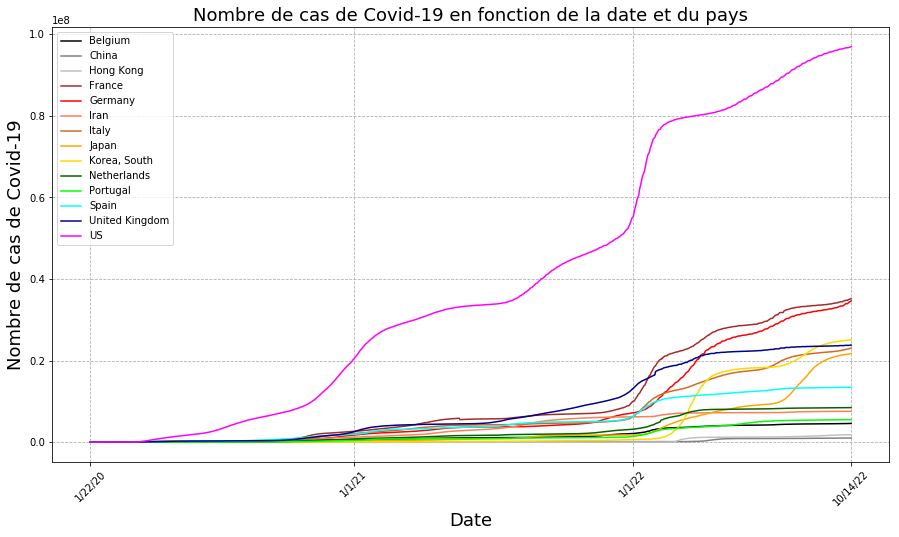

In [20]:
colors = ['black',
          'gray',
          'silver',
          'brown',
          'red',
          'coral',
          'chocolate',
          'orange',
          'gold',
          'darkgreen',
          'lime',
          'cyan',
          'darkblue',
          'magenta'
         ]
selected_data.plot(x = 'Date', 
                   y = ['Belgium','China','Hong Kong',
                        'France','Germany','Iran',
                        'Italy','Japan','Korea, South',
                        'Netherlands','Portugal','Spain',
                        'United Kingdom', 'US'],
                  figsize=(15, 8),
                  color = colors)

plt.title('Nombre de cas de Covid-19 en fonction de la date et du pays', fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Nombre de cas de Covid-19',fontsize = 18)

plt.xticks([0,345,710,996], 
           [selected_data['Date'][0],
            selected_data['Date'][345],
            selected_data['Date'][710],
            selected_data['Date'][996]],           
           rotation=45)

plt.grid(which='both', linestyle='--')

Nous avons donc un graphique représentant le nombre de cas de Covid-19 en fonction de la date et du pays. Nous allons maintenant refaire ce graphique avec toutes les données de chaque pays selectionné cumulées.

In [21]:
selected_data['Total'] = selected_data['Belgium'] + selected_data['China'] + selected_data['France'] + selected_data['Germany'] + selected_data['Hong Kong'] + selected_data['Iran'] + selected_data['Italy'] + selected_data['Japan'] + selected_data['Korea, South'] + selected_data['Netherlands'] + selected_data['Portugal'] + selected_data['Spain'] + selected_data['US'] + selected_data['United Kingdom']

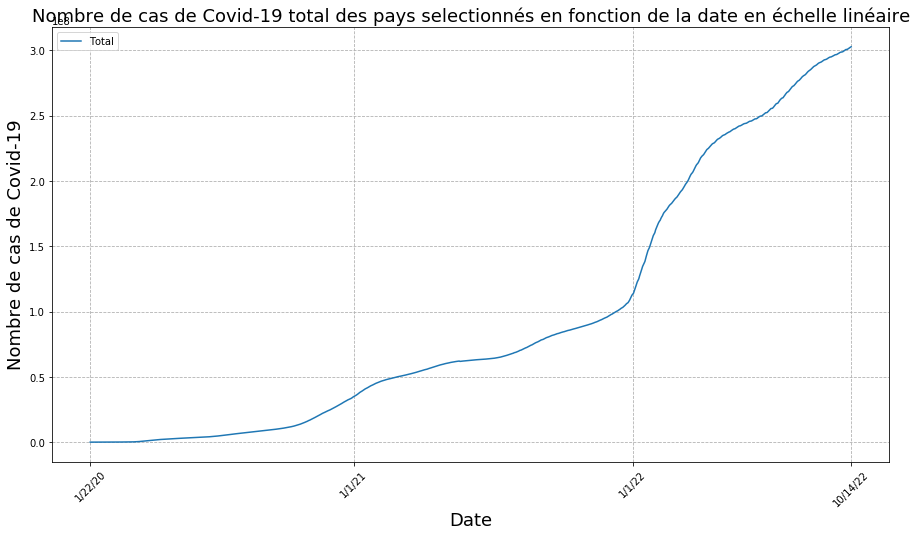

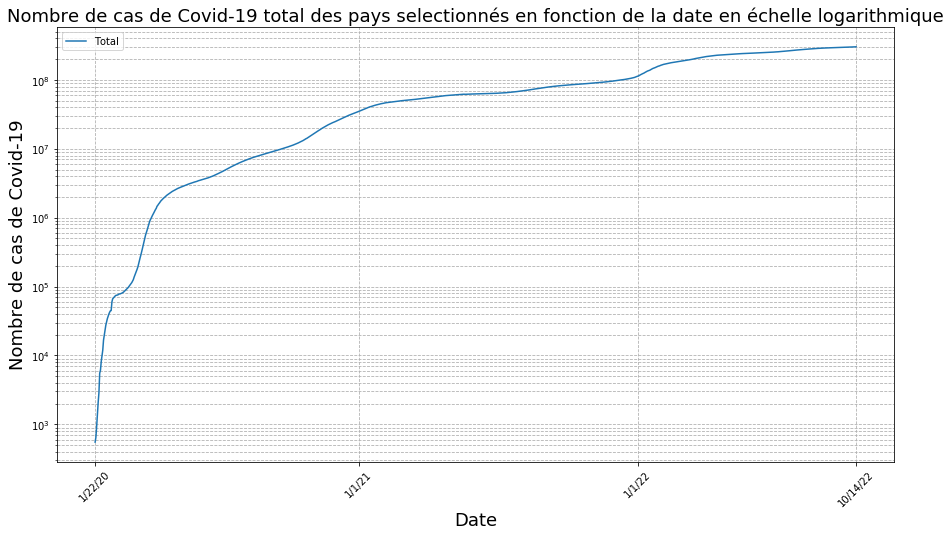

In [22]:
# Echelle linéaire
selected_data.plot(x = 'Date', 
                   y = 'Total',
                  figsize=(15, 8),)

plt.title('Nombre de cas de Covid-19 total des pays selectionnés en fonction de la date en échelle linéaire', fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Nombre de cas de Covid-19',fontsize = 18)

plt.xticks([0,345,710,996], 
           [selected_data['Date'][0],
            selected_data['Date'][345],
            selected_data['Date'][710],
            selected_data['Date'][996]],           
           rotation=45)

plt.grid(which='both', linestyle='--')
plt.show()

# Echelle logarithmique
selected_data.plot(x = 'Date', 
                   y = 'Total',
                  figsize=(15, 8),)

plt.title('Nombre de cas de Covid-19 total des pays selectionnés en fonction de la date en échelle logarithmique', fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Nombre de cas de Covid-19',fontsize = 18)
plt.yscale('log')

plt.xticks([0,345,710,996], 
           [selected_data['Date'][0],
            selected_data['Date'][345],
            selected_data['Date'][710],
            selected_data['Date'][996]],           
           rotation=45)

plt.grid(which='both', linestyle='--')
plt.show()